# Muhammad Luqman
## EDA Politician dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
dataFrame=pd.read_csv('Attacks_on_Political_Leaders_in_Pakistan.csv',encoding="ISO-8859-1")
df=dataFrame.copy()

In [0]:
df.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,16-Oct-51,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,9-May-58,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,8-Feb-85,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,6-Apr-90,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1-May-93,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


In [0]:
df.shape

(51, 18)

In [0]:
df.isnull().sum()

Politician             0
Day                    0
Date                   0
Day Type               0
Time                   0
City                   0
Location               0
Location Category      3
Province               0
Latitude               0
Longititude            0
Target Category        0
Space (Open/Closed)    0
Party                  0
Target Status          0
Killed                 0
Injured                0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 18 columns):
S#                     51 non-null int64
Politician             51 non-null object
Day                    51 non-null object
Date                   51 non-null object
Day Type               51 non-null object
Time                   51 non-null object
City                   51 non-null object
Location               51 non-null object
Location Category      48 non-null object
Province               51 non-null object
Latitude               51 non-null float64
Longititude            51 non-null float64
Target Category        51 non-null object
Space (Open/Closed)    51 non-null object
Party                  51 non-null object
Target Status          51 non-null object
Killed                 51 non-null int64
Injured                51 non-null int64
dtypes: float64(2), int64(3), object(13)
memory usage: 7.6+ KB


In [0]:
df.dtypes

S#                       int64
Politician              object
Day                     object
Date                    object
Day Type                object
Time                    object
City                    object
Location                object
Location Category       object
Province                object
Latitude               float64
Longititude            float64
Target Category         object
Space (Open/Closed)     object
Party                   object
Target Status           object
Killed                   int64
Injured                  int64
dtype: object

In [0]:
df.drop('S#', axis=1, inplace=True)

In [0]:
df['Target Status'].value_counts()

Killed     31
Escaped    20
Name: Target Status, dtype: int64

In [0]:
df['Target Category'].value_counts()

Suicide    27
Target     24
Name: Target Category, dtype: int64

In [0]:
df['Location'].value_counts()

near his house                                                                                        2
UNKNOWN                                                                                               2
she had gone to address a political rally                                                             1
roadside bomb blast targeting his vehicle                                                             1
PPP election office in Eidgah market of Parachinar bazar                                              1
Nakai in charsadda                                                                                    1
village in Kulachi, which is located 45 kilometers from Dera Ismail Khan                              1
Office of political agent                                                                             1
Essakhel village house of Local political leader                                                      1
A powerful bomb went off minutes after his highly-guarded convoy

In [0]:
df[df['Killed']>1].shape

(24, 17)

In [0]:
df['Location Category'].value_counts()

Residence          14
Road               11
Park/Ground         5
Market              4
Government          4
UNKNOWN             2
Office Building     1
Religious           1
University          1
Mobile              1
Transport           1
Hotel               1
Funeral             1
Details Missing     1
Name: Location Category, dtype: int64

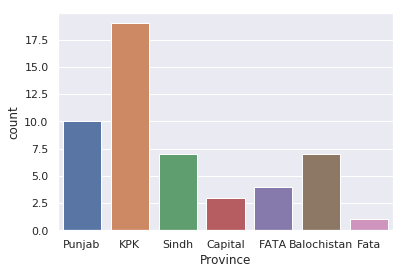

In [0]:
sns.countplot(data=df,x='Province')

In [0]:
killed_mostly=df.groupby('Party')['Target Status'].value_counts()
killed_mostly

Party                            Target Status
ANP                              Killed           4
                                 Escaped          3
All Pakistan Muslim League       Escaped          2
Alll India Muslim League         Killed           1
Assistant Political Agent        Killed           1
BAP                              Killed           1
BNP                              Killed           1
Baloch Nationalist               Killed           1
Baloch Student Organizaion       Killed           1
Chief Minister of West Pakistan  Killed           1
Hazara Democratic Party (HDP)    Killed           1
Independent                      Killed           2
JUIF                             Escaped          2
Local Political Leader           Escaped          3
                                 Killed           1
MMA                              Escaped          1
MQM                              Killed           1
Millat-i-Islamia                 Killed           1
Ministor         

## By party Heros

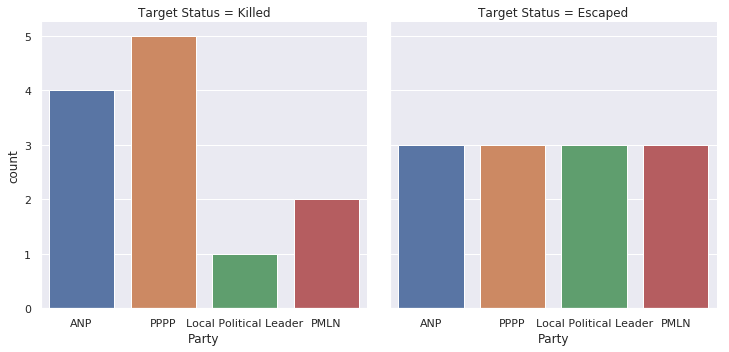

In [0]:
sns.catplot(data=df,x='Party',order=['ANP','PPPP','Local Political Leader','PMLN'],kind='count',col='Target Status')


### Target /Suicide -> escaped/Killed

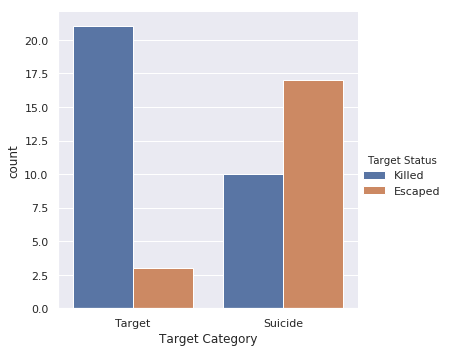

In [0]:
sns.catplot(data=df,x='Target Category',kind='count',hue='Target Status')


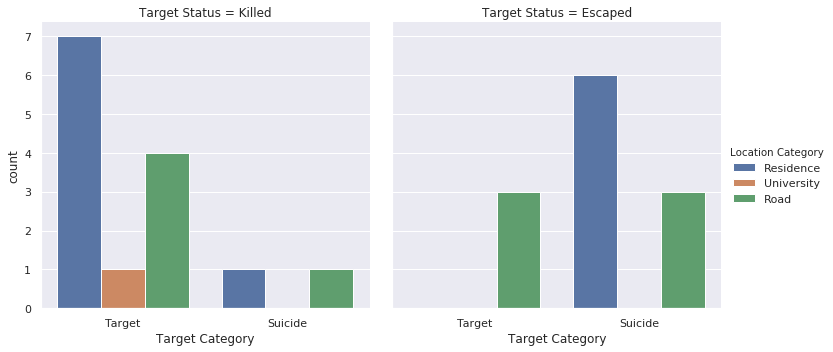

In [0]:
sns.catplot(data=df,hue='Location Category',hue_order=['Residence','University','Road'],kind='count',x='Target Category',col='Target Status')

# INSIGHTS


### 0.1- Time of Both analysis(Targeted/Suicidal)

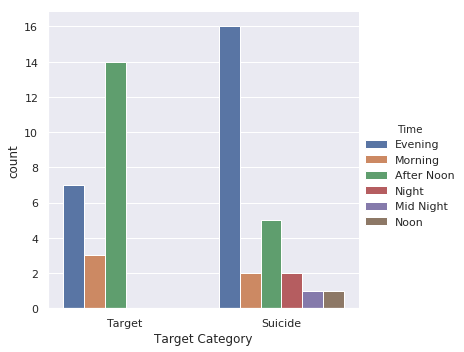

In [0]:
sns.catplot(data=df,hue='Time',kind='count',x='Target Category')

### 1- KPK contains most of the Incidents both(Targeted/Suicidal)

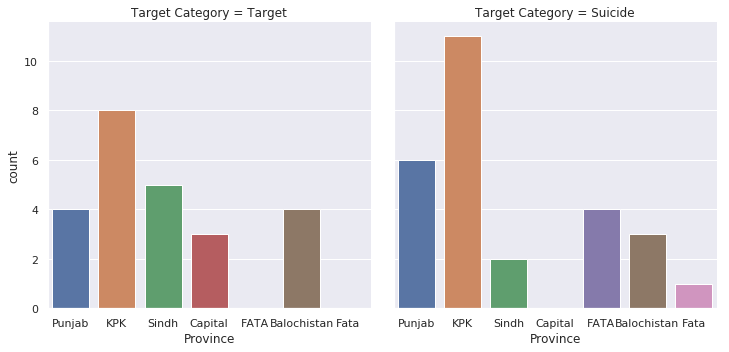

In [0]:
sns.catplot(x='Province', col='Target Category', data=df, kind='count',)

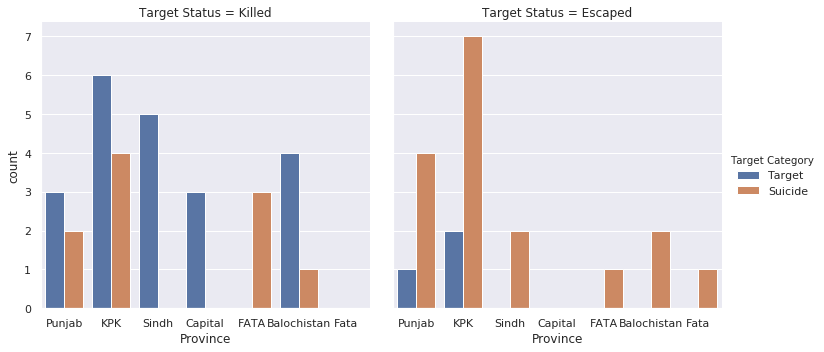

In [0]:
sns.catplot(data=df,x='Province',col='Target Status',hue='Target Category',kind='count')

### 2- Confirm Target Killed
### a-Target Killing = 80.9%
### b-Suicidal Killing = 37.2%

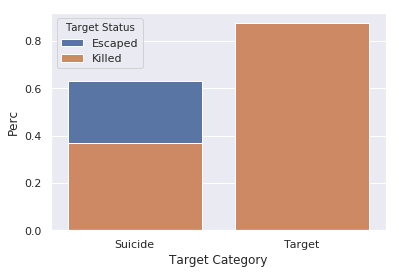

In [0]:
temp=df.groupby(['Target Category'])['Target Status'].value_counts(normalize=True).reset_index(name="Perc")
sns.barplot(data=temp,x='Target Category', y='Perc', hue='Target Status', dodge=False);



### 3-Parveez musharaf is the only one escaped and not injured when Targetted

In [0]:
df[(df['Target Status']=='Escaped') & (df['Target Category']=='Target') & (df['Injured']==0) & (df['Killed']==0)]

,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
7,Pervez Musharaf,Monday,15-Dec-03,Working Day,Evening,Rawalpindi,A powerful bomb went off minutes after his hig...,Road,Punjab,33.6058,73.0437,Target,Open,All Pakistan Muslim League,Escaped,0,0


### 4-Attacks are moslty carried out on Working days

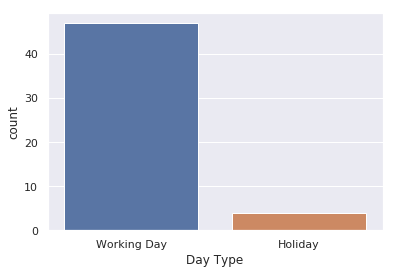

In [0]:
sns.countplot(data=df,x='Day Type')

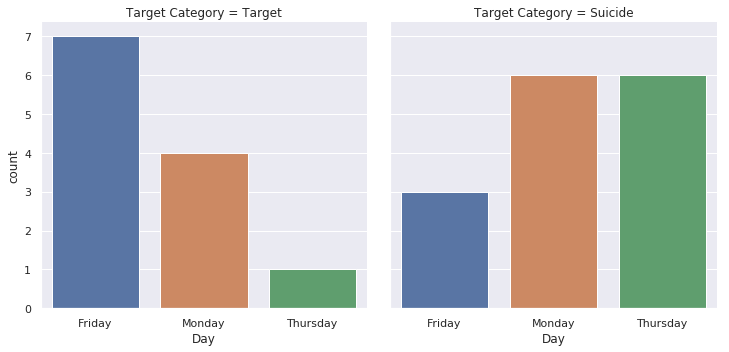

In [0]:
sns.catplot(data=df,col='Target Category',x='Day',order=['Friday','Monday','Thursday'],kind='count')

### 5-Target Category and Target status linked 
  
  ### Escaping
### closed suicide =29.4
### open suicide=70.5

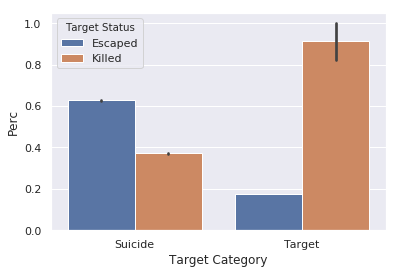

In [0]:
temp=df.groupby(['Target Category','Space (Open/Closed)'])['Target Status'].value_counts(normalize=True).reset_index(name="Perc")
sns.barplot(data=temp,x='Target Category', y='Perc', hue='Target Status', dodge=True);

### 5- Suicidal Attack Failure but People injured/Killed
### total cases = 17
### injuries/killings happened = 14
### total percentage  = 82.3 % Failed

In [0]:
df[(df['Target Status']=='Escaped') & (df['Target Category']=='Suicide')   ].shape

(17, 17)

In [0]:
df[(df['Target Status']=='Escaped') & (df['Target Category']=='Suicide')  & (df['Injured']>=1) & (df['Killed']>=1) ].shape

(14, 17)

In [0]:
14/17

0.8235294117647058

# Project completed (as far as i know ) :P